In [ ]:
# making the required imports

import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
#load & split data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
# reshaping 
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
model = Sequential()

#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test))


Epoch 1/25
782/782 [==============================] - 11s 13ms/step - loss: 1.7920 - accuracy: 0.3317 - val_loss: 1.1539 - val_accuracy: 0.6003
Epoch 2/25
782/782 [==============================] - 9s 12ms/step - loss: 1.1448 - accuracy: 0.5936 - val_loss: 0.9349 - val_accuracy: 0.6708
Epoch 3/25
782/782 [==============================] - 9s 12ms/step - loss: 0.9284 - accuracy: 0.6751 - val_loss: 0.8279 - val_accuracy: 0.7055
Epoch 4/25
782/782 [==============================] - 9s 12ms/step - loss: 0.8138 - accuracy: 0.7163 - val_loss: 0.7731 - val_accuracy: 0.7351
Epoch 5/25
782/782 [==============================] - 9s 12ms/step - loss: 0.7514 - accuracy: 0.7378 - val_loss: 0.7102 - val_accuracy: 0.7514
Epoch 6/25
782/782 [==============================] - 9s 12ms/step - loss: 0.6850 - accuracy: 0.7622 - val_loss: 0.7095 - val_accuracy: 0.7521
Epoch 7/25
782/782 [==============================] - 9s 12ms/step - loss: 0.6373 - accuracy: 0.7766 - val_loss: 0.7110 - val_accuracy: 0.754

In [23]:
class_labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
# generate batch of 9 images to predict
batch = x_test[3290:3299]
labels = np.argmax(y_test[3290:3299],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 14ms/step


In [24]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0000001
0.99999994


In [25]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[5 5 4 1 0 9 4 3 3]


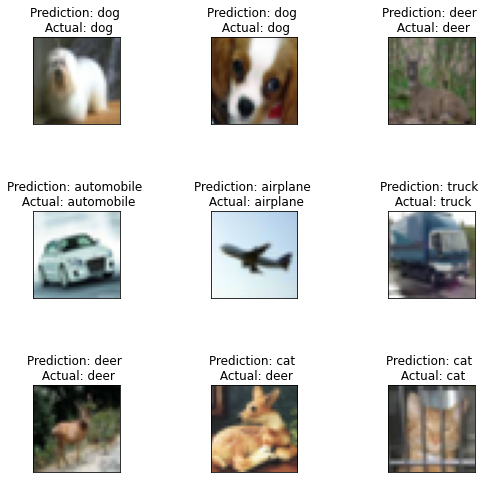

In [30]:
fig, axs = plt.subplots(3, 3, figsize = (9,8))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \n Actual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()